# Doodling and drafting

In [1]:
# Importing all necessary modules and functions for the project

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import acquire
import prepare

## Acquiring the data

In [137]:
# Where to explain the env.py file? ⚠️

# Getting the telco data using the acquire function
# acquire is a function that reads in telco data from Codeup database, transforms the data into
# a csv file if a local file does not exist and saves it locally. It returns a DataFrame.

telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## Examining the data for preparation step

In [24]:
# To find out the number of columns and rows in the dataset

telco.shape

(7043, 24)

In [25]:
# To print an exhaustive list of the columns and their content type as well as the possibility of null values

telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [288]:
telco.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure']

In [ ]:
# The total_charges column that should have been numerical (float) has object as data type

In [140]:
# Converting to float
telco['total_charges'] = telco.total_charges.astype(float)
telco.total_charges.dtype

ValueError: could not convert string to float: ''

In [142]:
# I could not convert to float because of space in the data so I'll strip those spaces off

telco['total_charges'] = telco['total_charges'].str.strip()
telco = telco[telco.total_charges != '']

In [143]:
# I will now change it to float

telco['total_charges'] = telco.total_charges.astype(float)
telco.total_charges.dtype

dtype('float64')

In [166]:
# We have reduced the data from 7043 to 7032 rows stripping it from empty total_charges.
# These do not matter because non only do they represent a very small sample of the data
# but they may be customer who have not been billed yet and thus fall outside our scope

telco.shape

(7032, 24)

In [162]:
# Printing the content of the columns that are not displayed to have a glimpse of the data

telco[['multiple_lines', 'online_security', 'online_backup','device_protection']]

,multiple_lines,online_security,online_backup,device_protection
0,No,No,Yes,No
1,Yes,No,No,No
2,No,No,No,Yes
3,No,No,Yes,Yes
4,No,No,No,No
...,...,...,...,...
7038,No,Yes,No,No
7039,Yes,No,No,No
7040,No,No,Yes,No
7041,No,Yes,No,Yes


In [163]:
# Running a .crosstab code to see if some columns are repetitive

pd.crosstab(telco.payment_type_id, telco.payment_type)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
payment_type_id,,,,
1,0,0,2365,0
2,0,0,0,1604
3,1542,0,0,0
4,0,1521,0,0


In [164]:
# Running a .crosstab code to see if some columns are repetitive

pd.crosstab(telco.internet_service_type, telco.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,2416,0,0
Fiber optic,0,3096,0
None,0,0,1520


In [165]:
# Running a .crosstab code to see if some columns are repetitive

pd.crosstab(telco.contract_type_id, telco.contract_type)

contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1472,0
3,0,0,1685


In [144]:
# Producing a statistical summary of all the numeric data without distinction to look for relevant data or pattern

telco.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7032.0,2.315557,1.149523,1.00,1.0000,2.000,3.0000,4.00
internet_service_type_id,7032.0,1.872582,0.737271,1.00,1.0000,2.000,2.0000,3.00
contract_type_id,7032.0,1.688567,0.832934,1.00,1.0000,1.000,2.0000,3.00
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [208]:
telco.churn == 'Yes'

0       False
1       False
2        True
3        True
4        True
        ...  
7038    False
7039     True
7040    False
7041    False
7042    False
Name: churn, Length: 7032, dtype: bool

In [220]:
round(telco.churn.value_counts(normalize=True)*100, 2)

No     73.42
Yes    26.58
Name: churn, dtype: float64

In [199]:
# Plot a histogram for relevant columns

relevant_cols = telco[['monthly_charges', 'tenure', 'total_charges']]
relevant_cols

,monthly_charges,tenure,total_charges
0,65.60,9,593.30
1,59.90,9,542.40
2,73.90,4,280.85
3,98.00,13,1237.85
4,83.90,3,267.40
...,...,...,...
7038,55.15,13,742.90
7039,85.10,22,1873.70
7040,50.30,2,92.75
7041,67.85,67,4627.65


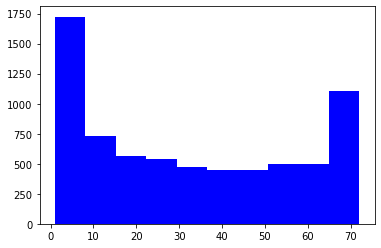

In [304]:
plt.hist(telco['tenure'], color='blue')
plt.show()

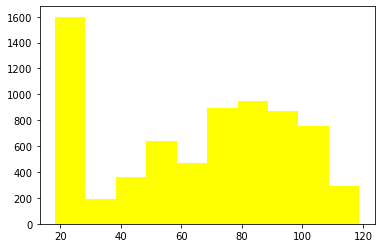

In [303]:
plt.hist(telco['monthly_charges'], color='yellow')
plt.show()

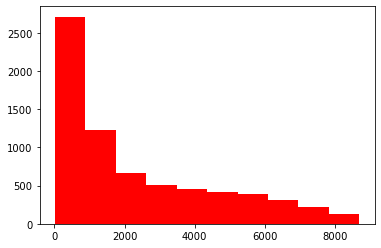

In [306]:
plt.hist(telco['total_charges'], color='red')
plt.show()

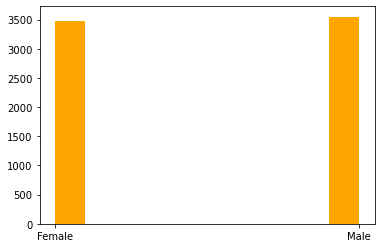

In [307]:
plt.hist(telco['gender'], color='orange')
plt.show()

In [291]:
telco.gender.value_counts(normalize=True)*100

Male      50.469283
Female    49.530717
Name: gender, dtype: float64

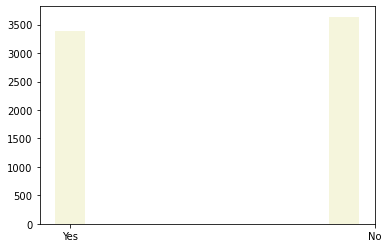

In [296]:
plt.hist(telco['partner'], align='left', color='beige')
plt.show()

In [300]:
telco.partner.value_counts(normalize=True)*100

No     51.749147
Yes    48.250853
Name: partner, dtype: float64

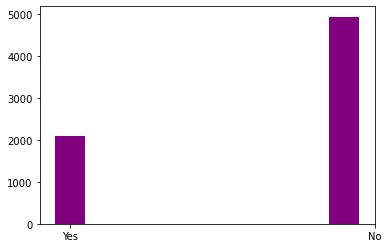

In [301]:
plt.hist(telco['dependents'], align='left', color='purple')
plt.show()

In [302]:
telco.dependents.value_counts(normalize=True)*100

No     70.150739
Yes    29.849261
Name: dependents, dtype: float64

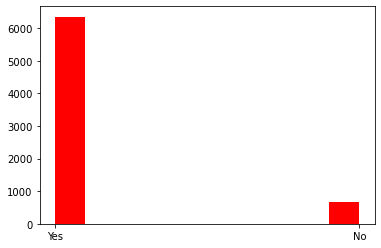

In [308]:
plt.hist(telco['phone_service'], color='red')
plt.show()

In [ ]:
plt.hist(telco['multiple_lines'], color='blue')
plt.show()

In [ ]:
plt.hist(telco['online_security'], color='green')
plt.show()

In [ ]:
plt.hist(telco['online_backup'], color='indigo')
plt.show()


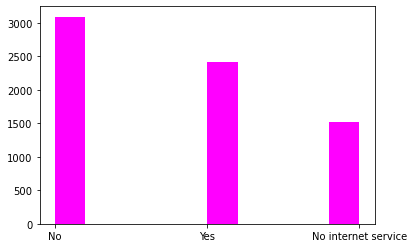

In [310]:
plt.hist(telco['device_protection'], color='fuchsia')
plt.show()


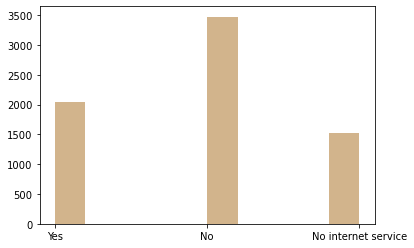

In [311]:
plt.hist(telco['tech_support'], color='tan')
plt.show()
